# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


The second objective attribute to be addressed will be the final position in a ±1 interval of each driver.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=2):
CV with make_scorer(balanced_accuracy_1interval_score): 0.25583551129005677
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.701364998253943
              precision    recall  f1-score   support

           1       0.53      0.76      0.62       252
           2       0.45      0.63      0.52       252
           3       0.31      0.45      0.36       252
           4       0.24      0.33      0.28       252
           5       0.22      0.31      0.26       252
           6       0.19      0.30      0.23       252
           7       0.20      0.29      0.23       252
           8       0.21      0.27      0.24       252
           9       0.17      0.21      0.19       252
          10       0.21      0.29      0.25       252
          11       0.19      0.23      0.21       252
          12       0.17      0.18      0.18       252
          13       0.19      0.15      0.17       252
   

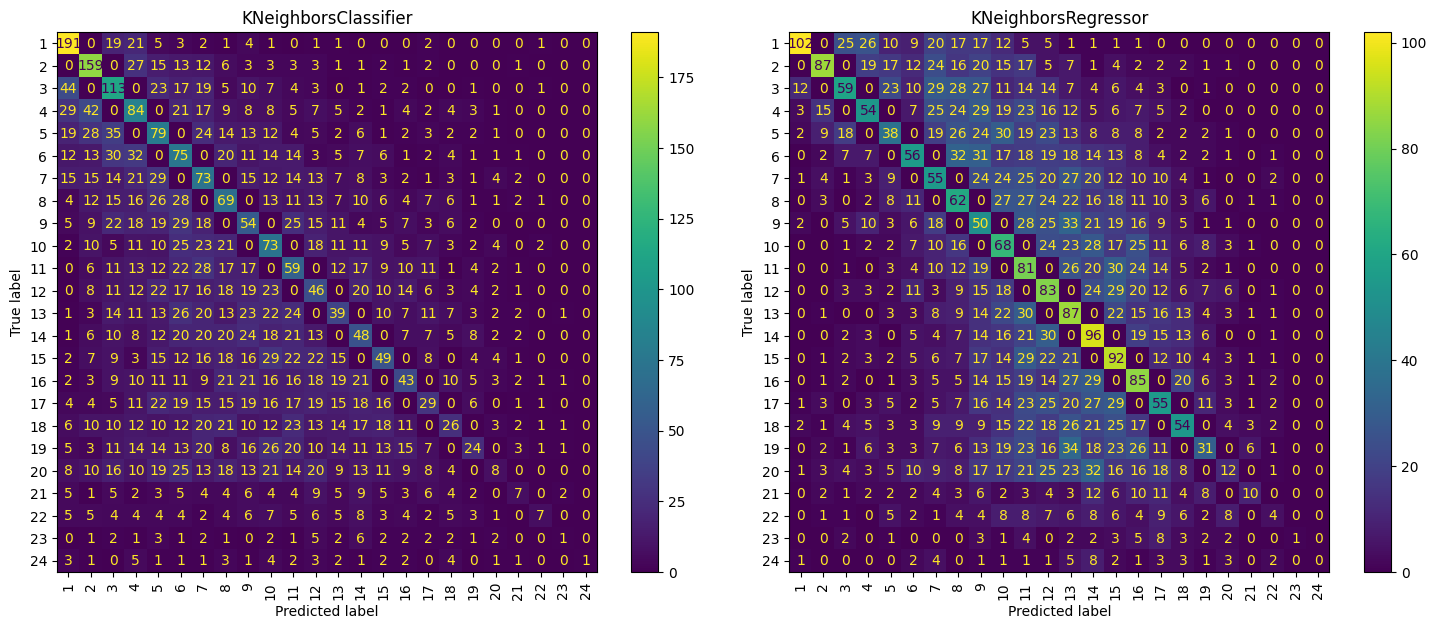

In [3]:
knn = (
    KNeighborsClassifier(n_neighbors=2, metric="euclidean", n_jobs=-1),
    KNeighborsRegressor(n_neighbors=3, metric="euclidean", n_jobs=-1),
)
model_test(knn, X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(criterion='entropy', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.33748156094747006
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.6012024290056206
              precision    recall  f1-score   support

           1       0.62      0.86      0.72       252
           2       0.63      0.77      0.69       252
           3       0.42      0.59      0.49       252
           4       0.38      0.48      0.42       252
           5       0.35      0.35      0.35       252
           6       0.36      0.41      0.38       252
           7       0.22      0.35      0.27       252
           8       0.43      0.32      0.37       252
           9       0.17      0.21      0.19       252
          10       0.50      0.32      0.39       252
          11       0.15      0.29      0.20       252
          12       0.27      0.39      0.32       252
          13       0.25      0.24      0.25       252
          14

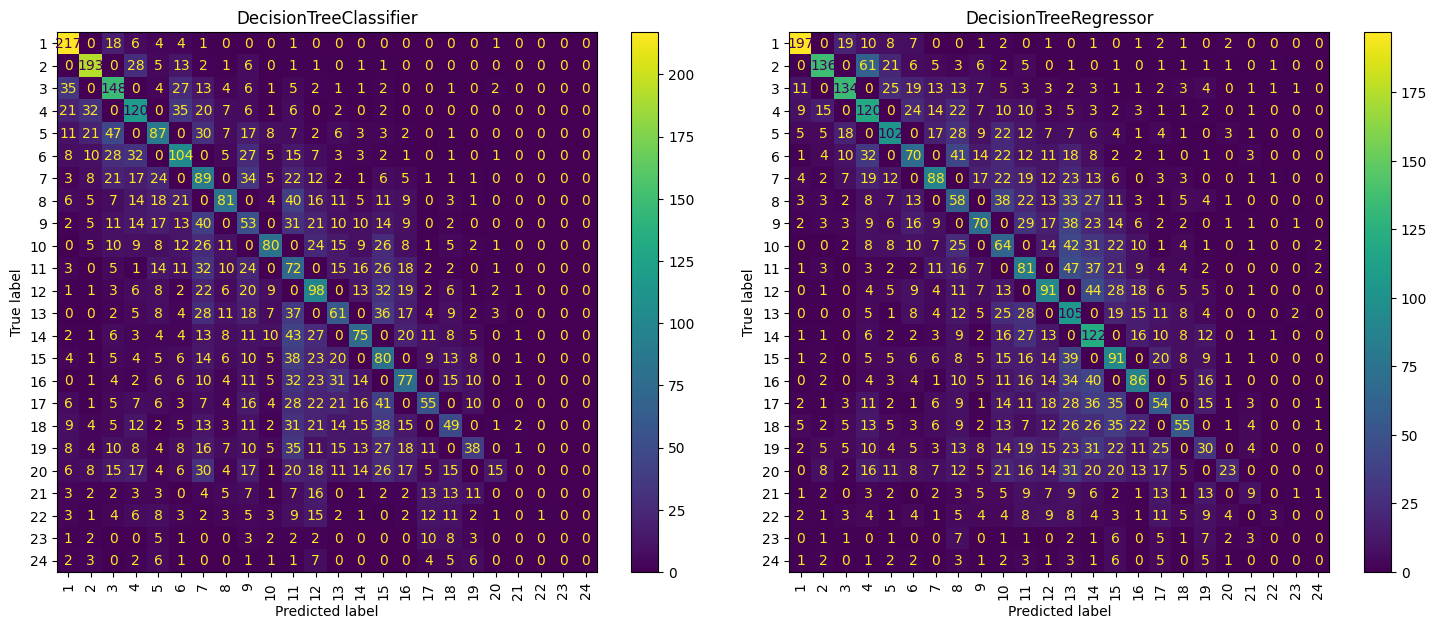

In [4]:
tree = (
    DecisionTreeClassifier(max_depth=4, criterion="entropy"),
    DecisionTreeRegressor(max_depth=5, criterion="absolute_error"),
)
model_test(tree, X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=20,
                       n_jobs=-1):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3346185485390031
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.7357179910801666
              precision    recall  f1-score   support

           1       0.43      0.97      0.60       252
           2       0.66      0.81      0.73       252
           3       0.44      0.41      0.43       252
           4       0.35      0.39      0.37       252
           5       0.44      0.38      0.41       252
           6       0.27      0.39      0.32       252
           7       0.30      0.33      0.32       252
           8       0.41      0.26      0.32       252
           9       0.22      0.23      0.23       252
          10       0.23      0.25      0.24       252
          11       0.29      0.33      0.31       252
          12       0.20      0.37      0.26       252
          13    

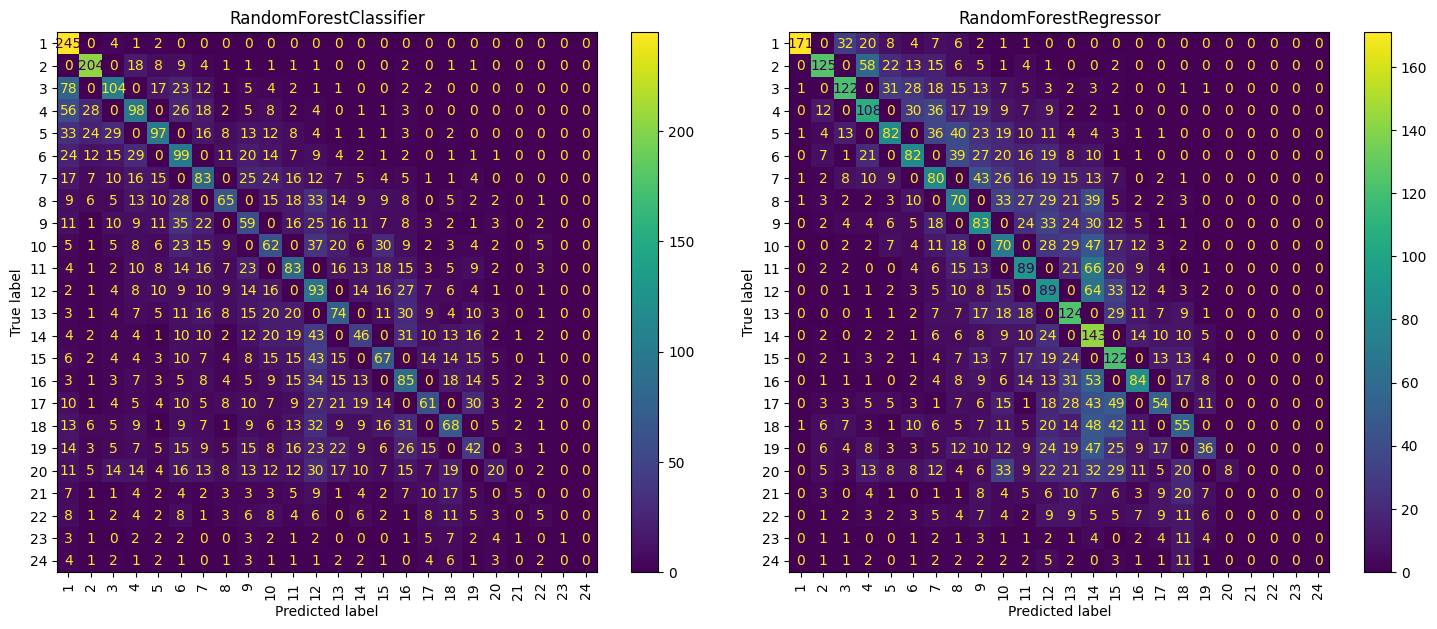

In [5]:
random_forest = (
    RandomForestClassifier(
        n_estimators=20, max_depth=4, criterion="entropy", n_jobs=-1
    ),
    RandomForestRegressor(
        n_estimators=20, max_depth=4, criterion="absolute_error", n_jobs=-1
    ),
)
model_test(random_forest, X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35344468872877965
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.435665817705024
              precision    recall  f1-score   support

           1       0.63      0.92      0.75       252
           2       0.61      0.76      0.67       252
           3       0.55      0.57      0.56       252
           4       0.42      0.49      0.45       252
           5       0.38      0.44      0.41       252
           6       0.30      0.48      0.37       252
           7       0.26      0.42      0.32       252
           8       0.42      0.29      0.34       252
           9       0.26      0.20      0.22       252
          10       0.32      0.27      0.29       252
          11       0.19      0.30      0.23       252
          12       0.31      0.35      0.33       252
          13       0.19      0.23      0.21       252
    

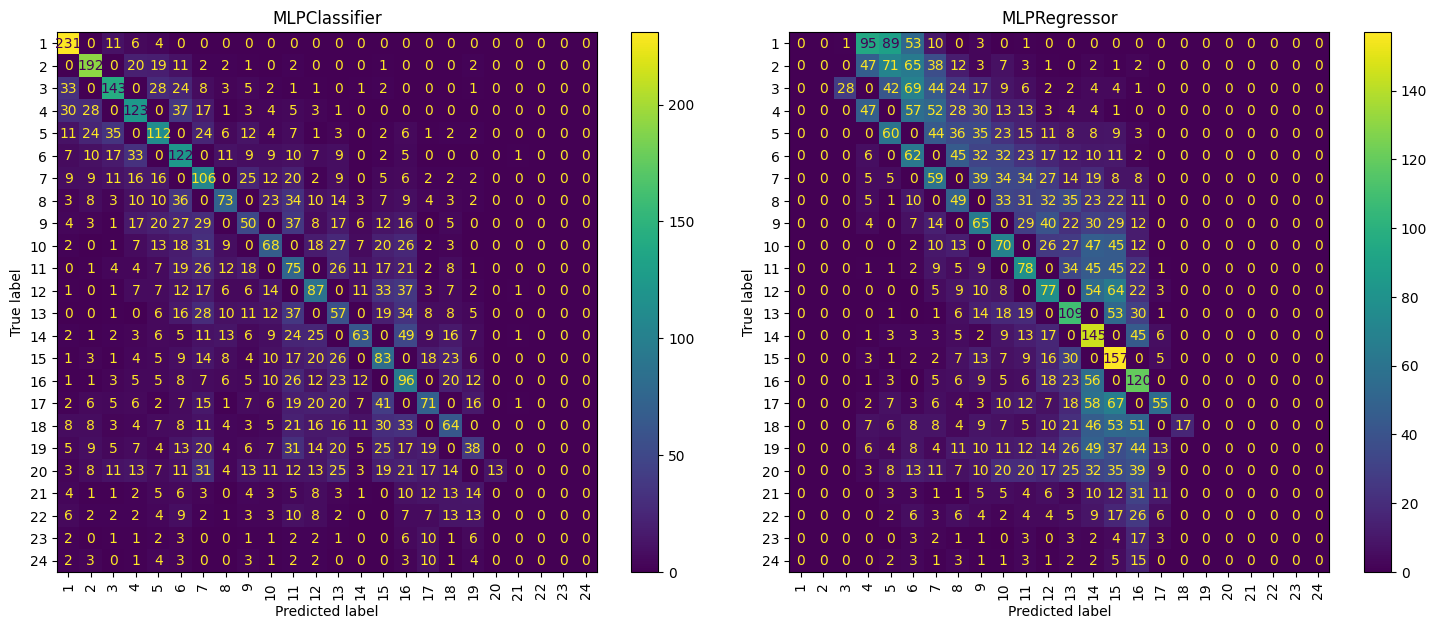

In [6]:
nn = (
    MLPClassifier(hidden_layer_sizes=(50, 25), activation="logistic"),
    MLPRegressor(hidden_layer_sizes=(60, 30), activation="logistic"),
)
model_test(nn, X, y, tscv, scorers=scorers, interval=1)